In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00


In [2]:
!pip install deepface
from deepface import DeepFace
model = DeepFace.build_model("Facenet")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.4 MB/s eta 0:00:00
25-11-23 04:54:50 - Directory /root/.deepface has been created
25-11-23 04:54:50 - Directory /root/.deepface/weights has been created
25-11-23 04:54:54 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 110MB/s]


In [3]:
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)


Saving ayatullah_4.jpg to ayatullah_4.jpg
Uploaded: ayatullah_4.jpg


In [4]:
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_face(img_path):

    faces = DeepFace.extract_faces(
        img_path = img_path,
        detector_backend = "mtcnn",
        enforce_detection = True)


    face = faces[0]["face"]
    face = (face * 255).astype("uint8")

    face = cv2.resize(face, (160, 160))

    return face


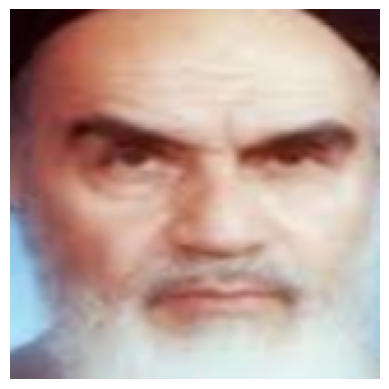

In [5]:
face = extract_face(img_path)
plt.imshow(face)
plt.axis("off")
plt.show()


In [6]:
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from deepface import DeepFace
import numpy as np

detectors = ["mtcnn", "retinaface", "opencv"]

embedding = None

for detector in detectors:
    try:
        embedding = DeepFace.represent(
            img_path=img_path,
            model_name="Facenet",
            detector_backend=detector,
            enforce_detection=True
        )[0]["embedding"]
        print(f"Face detected using {detector}!")
        break  # stop at the first successful detector
    except Exception as e:
        print(f"{detector} failed: {e}")

if embedding is None:
    print("❌ All detectors failed to detect a face")
else:
    print("Embedding shape:", np.array(embedding).shape)
    print("First 5 values:", embedding[:5])


Face detected using mtcnn!
Embedding shape: (128,)
First 5 values: [-0.2027963399887085, 0.26972347497940063, 1.0219918489456177, 1.5494050979614258, 1.4853143692016602]


In [9]:
from deepface import DeepFace
from numpy import dot
from numpy.linalg import norm
from google.colab import files
import numpy as np

def cosine_similarity(emb1, emb2):
    return dot(emb1, emb2) / (norm(emb1) * norm(emb2))

def get_embedding(img_path, model_name="Facenet"):
    detectors = ["mtcnn", "retinaface", "opencv"]
    embedding = None
    for detector in detectors:
        try:
            embedding = DeepFace.represent(
                img_path=img_path,
                model_name=model_name,
                detector_backend=detector,
                enforce_detection=True
            )[0]["embedding"]
            print(f"✅ Face detected in {img_path} using {detector}")
            break
        except Exception as e:
            print(f"❌ {detector} failed for {img_path}: {e}")
    if embedding is None:
        print(f"❌ All detectors failed for {img_path}")
    return embedding

img1_path = img_path
embedding1 = get_embedding(img1_path)
if embedding1 is None:
    raise ValueError(f"Face could not be detected in {img1_path}")

uploaded = files.upload()
img2_path = list(uploaded.keys())[0]
embedding2 = get_embedding(img2_path)
if embedding2 is None:
    raise ValueError(f"Face could not be detected in {img2_path}")

similarity = cosine_similarity(embedding1, embedding2)
print("Cosine similarity:", similarity)

if similarity > 0.2:
    print("✅ Same person")
else:
    print("❌ Different person")


✅ Face detected in ayatullah_4.jpg using mtcnn


Saving ayatullah3.jpg to ayatullah3 (1).jpg
✅ Face detected in ayatullah3 (1).jpg using mtcnn
Cosine similarity: 0.1060739803041824
❌ Different person
